<a href="https://colab.research.google.com/github/SeungHoon2/Projects/blob/main/AI_03_%EC%9D%B4%EC%8A%B9%ED%9B%88_section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **데이터 불러오기 & 전처리**

In [ ]:
import pandas as pd
import numpy as np

# 구글드라이브로 불러오기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
url = '/content/vgames2.csv'
df = pd.read_csv(url)
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
# 데이터 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [ ]:
# 형변환
def value_to_float(x): 
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return float(x.replace(",", ""))

df['NA_Sales'] = df['NA_Sales'].apply(value_to_float)
df['EU_Sales'] = df['EU_Sales'].apply(value_to_float)
df['JP_Sales'] = df['JP_Sales'].apply(value_to_float)
df['Other_Sales'] = df['Other_Sales'].apply(value_to_float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  float64
 7   EU_Sales     16598 non-null  float64
 8   JP_Sales     16598 non-null  float64
 9   Other_Sales  16598 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.3+ MB


In [ ]:
# 결측치 확인
df.isnull().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
# 출고량 합계
df['Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']


# **지역에 따라서 선호하는 게임 장르가 다를까**

In [ ]:
# 장르의 종류확인
df['Genre'].value_counts(dropna = False)

Action          3305
Sports          2341
Misc            1734
Role-Playing    1483
Shooter         1308
Adventure       1280
Racing          1243
Platform         884
Simulation       865
Fighting         847
Strategy         680
Puzzle           578
NaN               50
Name: Genre, dtype: int64

In [ ]:
# 장르 배열로 저장
Genre = np.array(['Action', 'Sports', 'Misc', 'Role-Playing', 'Shooter', 'Adventure', 'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle'])
Genre

array(['Action', 'Sports', 'Misc', 'Role-Playing', 'Shooter', 'Adventure',
       'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy',
       'Puzzle'], dtype='<U12')

In [ ]:
# 장르별 지역출고량 추출
df1 = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df1 = df1.dropna()

df1_Action = df1[(df1.Genre == 'Action')]
df1_Action = df1_Action[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df1_Action.sum()

df1_Sports = df1[(df1.Genre == 'Sports')]
df1_Sports = df1_Sports[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df1_Sports.sum()

df1_Misc = df1[(df1.Genre == 'Misc')]
df1_Misc = df1_Misc[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df1_Misc.sum()

df1_RolePlaying = df1[(df1.Genre == 'Role-Playing')]
df1_RolePlaying = df1_RolePlaying[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df1_RolePlaying.sum()

df1_Shooter = df1[(df1.Genre == 'Shooter')]
df1_Shooter = df1_Shooter[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df1_Shooter.sum()

df1_Adventure = df1[(df1.Genre == 'Adventure')]
df1_Adventure = df1_Adventure[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df1_Adventure.sum()

df1_Racing = df1[(df1.Genre == 'Racing')]
df1_Racing = df1_Racing[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df1_Racing.sum()

df1_Platform = df1[(df1.Genre == 'Platform')]
df1_Platform = df1_Platform[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df1_Platform.sum()

df1_Simulation = df1[(df1.Genre == 'Simulation')]
df1_Simulation = df1_Simulation[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df1_Simulation.sum()

df1_Fighting = df1[(df1.Genre == 'Fighting')]
df1_Fighting = df1_Fighting[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df1_Fighting.sum()

df1_Strategy = df1[(df1.Genre == 'Strategy')]
df1_Strategy = df1_Strategy[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df1_Strategy.sum()

df1_Puzzle = df1[(df1.Genre == 'Puzzle')]
df1_Puzzle = df1_Puzzle[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df1_Puzzle.sum()

# 장르별 지역출고량 데이터 프레임
df11 = pd.DataFrame([df1_Action.sum(), df1_Sports.sum(), df1_Misc.sum(), df1_RolePlaying.sum(), df1_Shooter.sum()
, df1_Adventure.sum(), df1_Racing.sum(), df1_Platform.sum(), df1_Simulation.sum(), df1_Fighting.sum(), df1_Strategy.sum(), df1_Puzzle.sum()], 
index = Genre)



df11
df12 = df11.T

df12

,Action,Sports,Misc,Role-Playing,Shooter,Adventure,Racing,Platform,Simulation,Fighting,Strategy,Puzzle
NA_Sales,21650853.16,12110668.41,4300403.75,1600317.94,12490569.43,760104.90,11950345.24,5220441.22,3240179.72,1360221.84,1050067.65,430122.92
EU_Sales,7210514.95,3840372.64,2820209.54,1610181.97,6230306.82,190063.86,2040235.06,7620193.99,1110112.24,1420099.80,120045.20,410050.32
JP_Sales,1440156.46,1450133.92,420104.85,11780333.17,60038.22,80051.87,280056.12,790129.86,1280062.42,1340086.00,1040048.42,56.87
Other_Sales,1340185.11,1210133.46,460073.58,1620055.34,740101.91,280016.53,420076.68,520051.01,70031.41,500036.14,310011.05,50012.47


In [ ]:
from scipy import stats
x_means = np.mean(df11)
x_means
x_max = np.max(df11,axis=0)
x_t, x_p = stats.ttest_ind(df11, x_max)
x = pd.DataFrame(x_p, columns=['p-value'], index=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
x


,p-value
NA_Sales,0.309912
EU_Sales,0.010822
JP_Sales,0.006154
Other_Sales,0.000571


지역에 따라서 선호하는 게임 장르가 다를까?

---


1.   북미지역에서는 액션게임의 선호도가 가장 높으며 퍼즐게임을 선호하지 않는다. 
 
2.   유럽지역에서는 플랫폼게임, 액션게임, 슈팅게임 순으로 출고량이 많으며 전략게임과 어드벤처 게임이 가장 낮은 출고량을 보여준다

3.   일본지역에서는 롤플레잉 게임을 유독 선호한다. 다른 장르의 게임과는 비교될 앞도적인 출고량이다.

4.   기타지역은 특정 지역을 나타내는 지표가 아니여서 넘어가도록 한다. 






# **연도별 게임의 트렌드가 있을까**


In [ ]:
# 연도 확인하기
df['Year'].value_counts(dropna = False)

2009.0    1421
2008.0    1418
2010.0    1252
2007.0    1199
2011.0    1129
2006.0    1001
2005.0     937
2002.0     826
2003.0     768
2004.0     759
2012.0     655
2015.0     609
2014.0     580
2013.0     544
2001.0     480
2000.0     446
1998.0     376
2016.0     339
1999.0     338
1997.0     287
NaN        271
1996.0     260
1995.0     215
1994.0     120
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      20
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

In [ ]:
# 연도 통합하기
df.loc[df['Year'] <= 1000, 'Year']= +2000
df['Year'].value_counts(dropna = False)

2009.0    1421
2008.0    1418
2010.0    1252
2007.0    1199
2011.0    1129
2006.0    1001
2005.0     937
2002.0     826
2003.0     768
2004.0     759
2012.0     655
2015.0     609
2014.0     580
2013.0     544
2001.0     480
2000.0     446
1998.0     376
2016.0     339
1999.0     338
1997.0     287
NaN        271
1996.0     260
1995.0     215
1994.0     120
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      20
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

In [ ]:
# 지역별 출고량 합치기
df2 = df[['Year', 'Genre']]
df2 = df2.dropna()
df2['Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df2

,Year,Genre,Sales
0,2008.0,Action,0.04
1,2009.0,Action,0.18
2,2010.0,Adventure,0.02
3,2010.0,Misc,0.04
4,2010.0,Platform,0.25
...,...,...,...
16593,2006.0,Platform,0.20
16594,2005.0,Action,0.01
16595,2015.0,Sports,0.79
16596,2013.0,Action,0.38


In [ ]:
# 연도별 카운팅
df2.groupby('Year').count()

,Genre,Sales
Year,,
1980.0,8,8
1981.0,46,46
1982.0,36,36
1983.0,17,17
1984.0,14,14
1985.0,14,14
1986.0,20,20
1987.0,16,16
1988.0,15,15


In [ ]:
# groupby 함수를 이용해서 연도별 장르별 출고량 추출
df21 = df2.groupby(['Year', 'Genre']).sum()
df21

Sales
Year   Genre                  
1980.0 Action             0.34
       Fighting           0.77
       Misc               2.70
       Shooter            7.07
1981.0 Action        110014.68
...                        ...
2016.0 Sports        280014.18
       Strategy           0.52
2017.0 Action             0.01
       Role-Playing       0.04
2020.0 Simulation         0.29

[388 rows x 1 columns]

In [ ]:
# 표본이 적은 연도를 제외, 표본수가 충분한 1995년 부터 2016년 까지 추출
df21 = df21 [122:385]
df21

Sales
Year   Genre                  
1995.0 Action             3.13
       Adventure          0.71
       Fighting      340014.22
       Misc          110006.28
       Platform          16.69
...                        ...
2016.0 Role-Playing   30006.72
       Shooter        60013.91
       Simulation         0.39
       Sports        280014.18
       Strategy           0.52

[263 rows x 1 columns]

In [ ]:
# 연도별 장르별 게임 출고량 최종 데이터 프레임 생성

df95 = df21 [0:12]
df96 = df21 [12:24]
df22 = pd.merge(df95,df96, on='Genre', how = 'left')
df97 = df21 [24:36]
df22 = pd.merge(df22,df97, on='Genre', how = 'left')
df98 = df21 [36:48]
df22 = pd.merge(df22,df98, on='Genre', how = 'left')
df99 = df21 [48:60]
df22 = pd.merge(df22,df99, on='Genre', how = 'left')
df00 = df21 [60:72]
df22 = pd.merge(df22,df00, on='Genre', how = 'left')
df01 = df21 [72:84]
df22 = pd.merge(df22,df01, on='Genre', how = 'left')
df02 = df21 [84:96]
df22 = pd.merge(df22,df02, on='Genre', how = 'left')
df03 = df21 [96:108]
df22 = pd.merge(df22,df03, on='Genre', how = 'left')
df04 = df21 [108:120]
df22 = pd.merge(df22,df04, on='Genre', how = 'left')
df05 = df21 [120:132]
df22 = pd.merge(df22,df05, on='Genre', how = 'left')
df06 = df21 [132:144]
df22 = pd.merge(df22,df06, on='Genre', how = 'left')
df07 = df21 [144:156]
df22 = pd.merge(df22,df07, on='Genre', how = 'left')
df08 = df21 [156:168]
df22 = pd.merge(df22,df08, on='Genre', how = 'left')
df09 = df21 [168:180]
df22 = pd.merge(df22,df09, on='Genre', how = 'left')
df10 = df21 [180:192]
df22 = pd.merge(df22,df10, on='Genre', how = 'left')
df11 = df21 [192:204]
df22 = pd.merge(df22,df11, on='Genre', how = 'left')
df12 = df21 [204:216]
df22 = pd.merge(df22,df12, on='Genre', how = 'left')
df13 = df21 [216:228]
df22 = pd.merge(df22,df13, on='Genre', how = 'left')
df14 = df21 [228:240]
df22 = pd.merge(df22,df14, on='Genre', how = 'left')
df15 = df21 [240:252]
df22 = pd.merge(df22,df15, on='Genre', how = 'left')
df16 = df21 [252:264]
df22 = pd.merge(df22,df16, on='Genre', how = 'left')

years = ['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
                '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016' ]

df22.columns = years

df22 = df22.fillna(0)
df23 = df22.T

df23



Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
1995,3.13,0.71,340014.22,110006.28,16.69,2.69,6.09,14.27,30003.50,50004.12,7.99,6.46
1996,610019.99,3.36,18.04,10.66,2920025.31,3.92,5550021.40,43.99,20006.88,40011.29,110017.28,5.61
1997,270026.95,4.97,240011.56,20005.66,210021.65,5.87,90031.83,290021.53,10022.15,1310008.33,50029.99,130007.59
1998,4100035.31,240008.80,31.68,11.84,320028.61,6.35,26.69,3140024.95,780009.02,7.11,40041.71,12.94
1999,30027.59,7.61,14.31,50020.63,50020.75,1.34,2700034.49,710046.53,12.23,11.46,30030.18,18.47
2000,39.02,3.90,1450020.03,60016.97,320021.40,10004.58,330022.80,2980053.22,1300013.95,4.23,1660044.59,750008.70
2001,810055.87,8.96,18.10,190016.20,2410036.92,7.94,1120054.01,60021.96,24.81,30019.51,2670047.23,30007.51
2002,1630085.02,230010.84,24.92,210015.35,230045.72,5.33,270029.75,45.09,47.64,10.82,600064.70,5.51
2003,430067.55,2.12,40023.75,870022.92,3140036.71,1.71,640050.45,550029.74,610026.49,20.91,20055.48,100007.85
2004,370075.57,8.63,200016.56,20031.14,46.59,8.36,350045.26,3160050.79,60046.86,10.89,960060.15,10007.13


In [ ]:
# 연도별 최고출고량과 평균출고량의 p-value 추출
y_mean = np.mean(df23, axis=1)
y_max = np.max(df23,axis=1)
y_t, y_p = stats.ttest_ind(df22, y_max)
y = pd.DataFrame(y_p, columns=['p-value'], index=years)
y


,p-value
1995,0.000099
1996,0.005576
1997,0.000221
1998,0.003385
1999,0.000396
2000,0.002489
2001,0.001575
2002,0.000281
2003,0.001087
2004,0.000735


# **출고량이 높은 게임에 대한 분석 및 시각화 프로세스**

In [ ]:
# 출고량이 높은 순서로 배열
df
df3 = df[['Name', 'Platform', 'Year', 'Genre', 'Publisher']]
df3['Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df3 = df3.sort_values('Sales', ascending = False)
df3 = df3[0:9]
df3.reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,index,Name,Platform,Year,Genre,Publisher,Sales
0,10913,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9630006.75
1,12600,Halo: Reach,X360,2010.0,Shooter,Microsoft Game Studios,7030002.84
2,577,Mario Kart 64,N64,1996.0,Racing,Nintendo,5550004.32
3,1971,Pokemon X/Pokemon Y,3DS,2013.0,NaN,Nintendo,5170009.18
4,1964,The Legend of Zelda: Ocarina of Time,N64,1998.0,Action,Nintendo,4100003.50
5,1810,Pokemon FireRed/Pokemon LeafGreen,GBA,2004.0,Role-Playing,Nintendo,3150007.34
6,8533,Pokémon Yellow: Special Pikachu Edition,GB,1998.0,Role-Playing,Nintendo,3120011.52
7,9829,Super Mario Bros. 3,GBA,2003.0,Platform,Nintendo,2930002.28
8,7865,FIFA 14,X360,2013.0,Sports,Electronic Arts,2930001.39


In [ ]:
# 새로운 데이터 프레임 생성
name = np.array(df3['Name'])
sales = np.array(df3['Sales'])
name
df31 = pd.DataFrame(sales, index=name, columns=['Sale'])
df31


,Sale
Grand Theft Auto V,9630006.75
Halo: Reach,7030002.84
Mario Kart 64,5550004.32
Pokemon X/Pokemon Y,5170009.18
The Legend of Zelda: Ocarina of Time,4100003.50
Pokemon FireRed/Pokemon LeafGreen,3150007.34
Pokémon Yellow: Special Pikachu Edition,3120011.52
Super Mario Bros. 3,2930002.28
FIFA 14,2930001.39


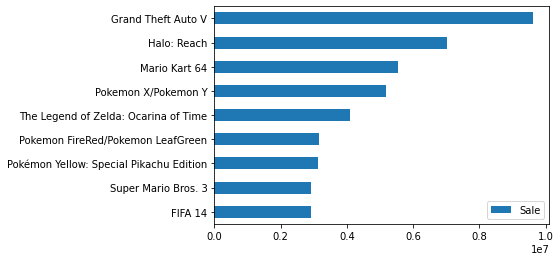

In [ ]:
# 출고량 TOP10 그래프
df32 = df31.sort_values('Sale', ascending = True)
df32.plot(kind = 'barh')

# **다음 분기에 어떤 게임을 설계해야 할까**

In [ ]:
# 새로운 데이터 프레임 생성
df4 = df[['Platform', 'Sales']]
df5 = df[['Genre', 'Sales']]
df4

,Platform,Sales
0,DS,0.04
1,Wii,0.18
2,PSP,0.02
3,DS,0.04
4,PS3,0.25
...,...,...
16593,GC,0.20
16594,PSP,0.01
16595,PS3,0.79
16596,PSV,0.38


In [ ]:
# 플랫폼별 출고량 추출
df4 = df4.groupby(['Platform']).sum()
df4 = df4.sort_values('Sales', ascending = False)
df4

,Sales
Platform,
X360,30550949.05
PS,14860715.98
N64,14490204.19
PS3,12870945.02
PS2,12561243.21
GBA,8990308.86
Wii,8830917.22
DS,8110813.35
3DS,6620240.75


In [ ]:
# 장르별 출고량 추출
df5 = df5.groupby(['Genre']).sum()
df5 = df5.sort_values('Sales', ascending = False)
df5

,Sales
Genre,
Action,31641709.68
Shooter,19521016.38
Sports,18611308.43
Role-Playing,16610888.42
Racing,14690713.10
Platform,14150816.08
Misc,8000791.72
Simulation,5700385.79
Fighting,4620443.78
